<a href="https://colab.research.google.com/github/mohdammar128/DeepLearning-/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network implementation from scratch
hours studying | hours_sleeping | score_in test



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X=np.array([[3,5],[5,1],[10,2]],dtype=float)
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [ ]:
Y=np.array([[75],[82],[93]],dtype=float)
Y

array([[75.],
       [82.],
       [93.]])

In [ ]:
#hours studying | hours_sleeping | score_in test

# **Normalizing Data**


In [ ]:
X=X/np.amax(X,axis=0)
Y=Y/100

In [ ]:
X,Y

(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.4]]),
 array([[0.75],
        [0.82],
        [0.93]]))

In [ ]:
X.shape,Y.shape

((3, 2), (3, 1))

In [ ]:
class NeuralNetwork():
  #Define Hyperparameter
  def __init__(self):
    self.input_size=2
    self.output_size=1
    self.hidden_size=3
 #Define Weight parameter
    self.W=np.random.randn(self.input_size,self.hidden_size)
    self.V=np.random.randn(self.hidden_size,self.output_size)
  def forward(self,X):
      z1=np.dot(X,self.W) #first Hidden layer z_in
      self.a1=self.sigmoid(z1) # apply activation function for first hidden layer and store it as instance variable
      z2=np.dot(self.a1,self.V)
      y_hat=self.sigmoid(z2)
      return y_hat
    #sigmoid funtion
  def sigmoid(self,z):
    z_out=1/(1+np.exp(-z))
    return z_out

  def sigmoid_derivative(self,z):
    return np.exp(-z)/((1+np.exp(-z))**2)

  def constFuntion(self,X,Y):
    self.y_hat=self.forward(X)
    return 0.5*sum((Y-self.y_hat)**2)

  def costFuntion_derivative(self,X,Y):
    self.y_hat=self.forward(X)
    #dJ/dw= -(y-y_hat)*f'(y_hat)
    delta3=np.multiply(-(Y-self.y_hat),self.sigmoid_derivative(self.y_hat))
    #calculated gradient
    djdV=np.dot(self.a1.T,delta3)
    #propagating it to back
    delta2=np.dot(delta3,self.V.T)*self.sigmoid_derivative(self.a1)
    djdW=np.dot(X.T,delta2)

    return djdW,djdV

  def getParam(self):
    params=np.concatenate((self.W.ravel(),self.V.ravel()))
    return params

  def setParam(self,params):
    #get lastindex of W vetor
    w_start=0
    w_end=self.hidden_size*self.input_size
    self.W=np.reshape(params[w_start:w_end],(self.input_size,self.hidden_size))
    v_start=w_end
    v_end=len(params)
    self.V=np.reshape(params[v_start:v_end],(self.hidden_size,self.output_size))


  def compte_gradient(self,X,Y):
    djdW,djdV=self.costFuntion_derivative(X,Y)
    return np.concatenate((djdW.ravel(),djdV.ravel()))

In [ ]:
from scipy import optimize

In [ ]:
class Trainer(object):
  def __init__(self,nn):
    self.nn=nn

#After each iteration this will be call to updates weight
  def callbackF(self,params):
    self.nn.setParam(params)
    cost=self.nn.constFuntion(X,Y)
    self.J.append(cost)

  def costFunctionWrapper(self,params,X,Y):
    self.nn.setParam(params)
    cost=self.nn.constFuntion(X,Y)
    grad=self.nn.compte_gradient(X,Y)
    return cost,grad

  def train(self,X,Y):
    params0=self.nn.getParam()
    self.X=X
    self.Y=Y
    self.J=[]
    options={'maxiter':200,'disp':True}
    _res=optimize.minimize(self.costFunctionWrapper,params0,jac=True,method='BFGS',args=(X,Y),options=options,callback=self.callbackF)
    self.nn.setParam(_res.x)
    self.optimization_result=_res

In [ ]:
NN=NeuralNetwork()
T=Trainer(NN)
T.train(X,Y)

         Current function value: 0.001269
         Iterations: 18
         Function evaluations: 79
         Gradient evaluations: 67


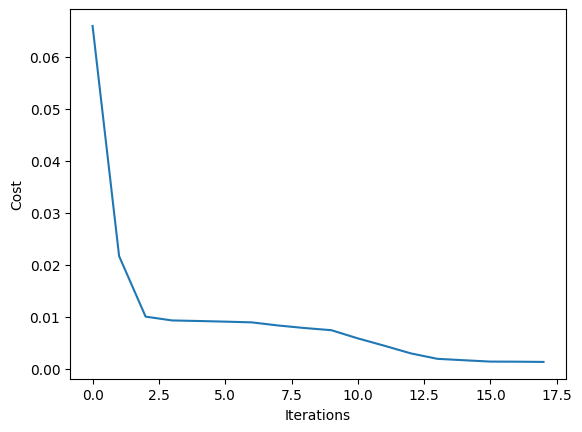

In [ ]:
plt.plot(T.J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# creating same thing using tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = np.array(([2, 5], [1, 8], [3, 3], [4, 6], [7, 2],
              [8, 4], [5, 9], [6, 1], [9, 7], [10, 5]),dtype=float)

Y = np.array(([60], [72], [55], [68], [80],
              [85], [70], [58], [92], [75]),dtype=float)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,Y_train.shape

((8, 2), (8, 1))

In [ ]:
model=Sequential([
    Dense(3,activation='sigmoid',input_shape=(2,)),#Hidden  layer with 3 neurons
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X_train,Y_train,epochs=1000,verbose=1)

# Using Pytorch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
X=torch.tensor(([2, 5], [1, 8], [3, 3], [4, 6], [7, 2],
              [8, 4], [5, 9], [6, 1], [9, 7], [10, 5]),dtype=torch.float32)
Y=torch.tensor(([60], [72], [55], [68], [80],
              [85], [70], [58], [92], [75]),dtype=torch.float32)

In [7]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
Y_scaled=scaler.fit_transform(Y)

X_scaled=torch.tensor(X_scaled,dtype=torch.float32)
Y_scaled=torch.tensor(Y_scaled,dtype=torch.float32)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

X_train=torch.tensor(X_train,dtype=torch.float32)
Y_train=torch.tensor(Y_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
Y_test=torch.tensor(Y_test,dtype=torch.float32)

<ipython-input-7-e5e947f72512>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train=torch.tensor(X_train,dtype=torch.float32)
<ipython-input-7-e5e947f72512>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train=torch.tensor(Y_train,dtype=torch.float32)
<ipython-input-7-e5e947f72512>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test=torch.tensor(X_test,dtype=torch.float32)
<ipython-input-7-e5e947f72512>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.c

In [8]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()
    self.hidden_layer=nn.Linear(2,3)
    self.output_layer=nn.Linear(3,1)
    self.relu=nn.ReLU()
  def forward(self,x):
    x=self.hidden_layer(x)
    x=self.relu(x)
    x=self.output_layer(x)
    return x


In [9]:
model=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [10]:
print(f"{criterion}")
print(f"{optimizer}")

MSELoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [11]:
epochs=1000
losses=[]
for epoch  in range(epochs):
  #forward pass and parameter
  y_pred=model(X_train)
  loss=criterion(y_pred,Y_train)
  #backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  if (epoch+1)%100==0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.0324
Epoch [200/1000], Loss: 0.0309
Epoch [300/1000], Loss: 0.0309
Epoch [400/1000], Loss: 0.0308
Epoch [500/1000], Loss: 0.0308
Epoch [600/1000], Loss: 0.0308
Epoch [700/1000], Loss: 0.0308
Epoch [800/1000], Loss: 0.0308
Epoch [900/1000], Loss: 0.0308
Epoch [1000/1000], Loss: 0.0308


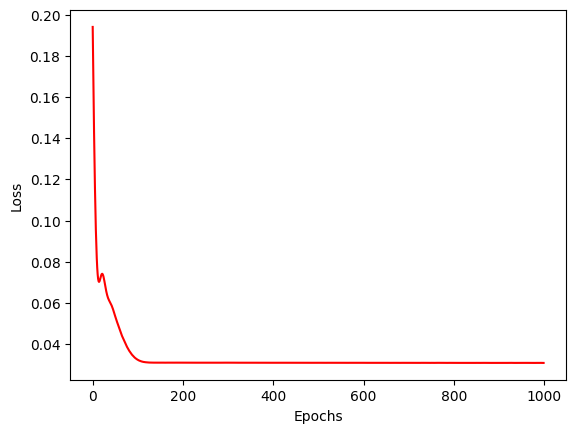

In [15]:
plt.plot(losses,color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
losses.pop()

0.03075585328042507

In [23]:
with torch.no_grad():
  y_pred=model(X_test)
  loss=criterion(y_pred,Y_test)
  print(f'Test Loss: {loss.item():.4f}')


prediction=scaler.inverse_transform(y_pred.numpy())
actual=scaler.inverse_transform(Y_test.numpy())
print(f"(actual,predicted): {(actual.flatten(),prediction.flatten())}")


Test Loss: 0.1020
(actual,predicted): (array([92., 72.], dtype=float32), array([82.01471, 58.597  ], dtype=float32))
